In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
madrid = pd.read_csv('madrid.csv')
madrid.head()

,Player,Time,ExtraTime,AdditionalTime,Sequence,Round,Team,Date,Field,League
0,Benzema,47,0,N,1,1,Real Madrid,2021-08-14,A,La Liga
1,Nacho,56,0,N,2,1,Real Madrid,2021-08-14,A,La Liga
2,Benzema,62,0,N,3,1,Real Madrid,2021-08-14,A,La Liga
3,Joselu,64,0,N,4,1,Alavés,2021-08-14,H,La Liga
4,Vinícius Junior,90,1,Y,5,1,Real Madrid,2021-08-14,A,La Liga


In [3]:
opponent = madrid[madrid['Team'] != 'Real Madrid']['Team'].values
opponent

array(['Alavés', 'Levante', 'Levante', 'Levante'], dtype=object)

In [4]:
madrid['Team'] = madrid['Team'].replace(opponent, 'Opponent')
madrid

,Player,Time,ExtraTime,AdditionalTime,Sequence,Round,Team,Date,Field,League
0,Benzema,47,0,N,1,1,Real Madrid,2021-08-14,A,La Liga
1,Nacho,56,0,N,2,1,Real Madrid,2021-08-14,A,La Liga
2,Benzema,62,0,N,3,1,Real Madrid,2021-08-14,A,La Liga
3,Joselu,64,0,N,4,1,Opponent,2021-08-14,H,La Liga
4,Vinícius Junior,90,1,Y,5,1,Real Madrid,2021-08-14,A,La Liga
5,Bale,5,0,N,1,2,Real Madrid,2021-08-22,A,La Liga
6,Marti Roger,46,0,N,2,2,Opponent,2021-08-22,H,La Liga
7,Campana,56,0,N,3,2,Opponent,2021-08-22,H,La Liga
8,Vinícius Junior,72,0,N,4,2,Real Madrid,2021-08-22,A,La Liga
9,Rober Pier,78,0,N,5,2,Opponent,2021-08-22,H,La Liga


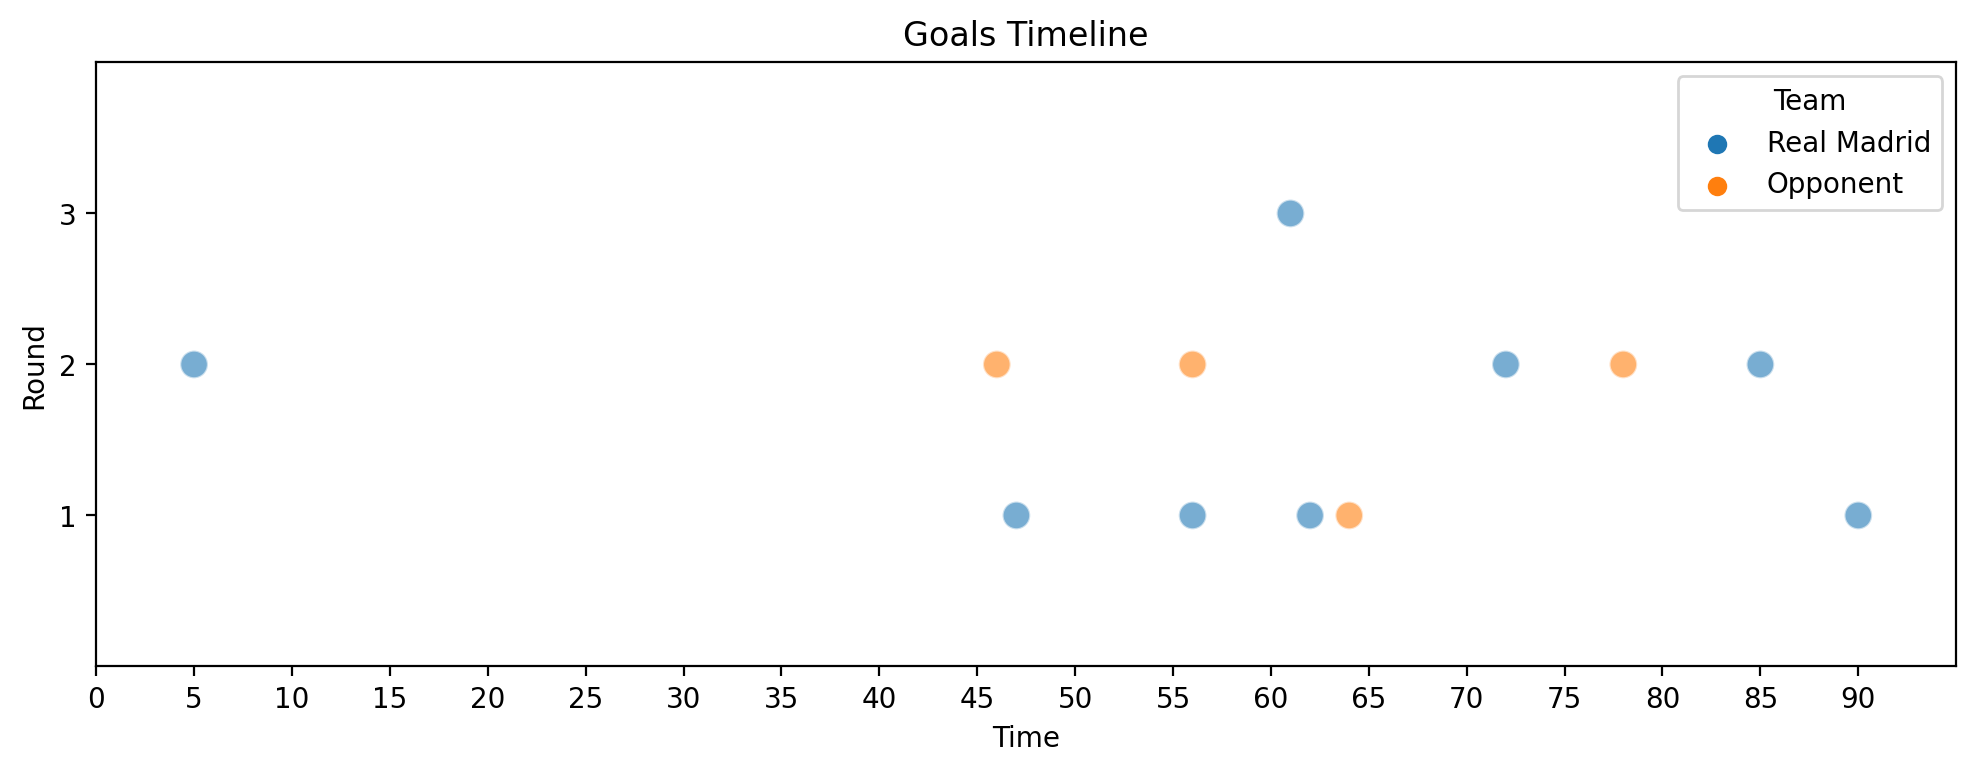

In [7]:
plt.figure(figsize=(12, 4), dpi=200)
plt.yticks(range(madrid['Round'].min(), madrid['Round'].max() + 1))
plt.xticks(range(0, 95, 5))
plt.xlim(0, 95)
plt.ylim(0, madrid['Round'].max() + 1)
plt.title('Goals Timeline')
sns.scatterplot(x='Time', y='Round', hue='Team', data=madrid, s=100, alpha=0.6);

In [8]:
madrid_goals = madrid[madrid['Team'] == 'Real Madrid']
madrid_goals

,Player,Time,ExtraTime,AdditionalTime,Sequence,Round,Team,Date,Field,League
0,Benzema,47,0,N,1,1,Real Madrid,2021-08-14,A,La Liga
1,Nacho,56,0,N,2,1,Real Madrid,2021-08-14,A,La Liga
2,Benzema,62,0,N,3,1,Real Madrid,2021-08-14,A,La Liga
4,Vinícius Junior,90,1,Y,5,1,Real Madrid,2021-08-14,A,La Liga
5,Bale,5,0,N,1,2,Real Madrid,2021-08-22,A,La Liga
8,Vinícius Junior,72,0,N,4,2,Real Madrid,2021-08-22,A,La Liga
10,Vinícius Junior,85,0,N,6,2,Real Madrid,2021-08-22,A,La Liga
11,Carvajal,61,0,N,1,3,Real Madrid,2021-08-28,A,La Liga


In [9]:
against_goals = madrid[madrid['Team'] != 'Real Madrid']
against_goals

,Player,Time,ExtraTime,AdditionalTime,Sequence,Round,Team,Date,Field,League
3,Joselu,64,0,N,4,1,Opponent,2021-08-14,H,La Liga
6,Marti Roger,46,0,N,2,2,Opponent,2021-08-22,H,La Liga
7,Campana,56,0,N,3,2,Opponent,2021-08-22,H,La Liga
9,Rober Pier,78,0,N,5,2,Opponent,2021-08-22,H,La Liga


In [10]:
# Number of goals scored by Madrid during first half
madrid_goals_fh = madrid_goals[(madrid_goals['Time'] <= 45) & (madrid_goals['AdditionalTime'] == 'N')]['Player'].count()
# Number of goals scored by Madrid during first half additional time
madrid_goals_fh_at = madrid_goals[(madrid_goals['Time'] <= 45) & (madrid_goals['AdditionalTime'] == 'Y')]['Time'].count()
# Number of goals scored by Madrid during second half
madrid_goals_sh = madrid_goals[(madrid_goals['Time'] > 45) & (madrid_goals['AdditionalTime'] == 'N')]['Time'].count()
# Number of goals scored by Madrid during second half additional time
madrid_goals_sh_at = madrid_goals[(madrid_goals['Time'] > 45) & (madrid_goals['AdditionalTime'] == 'Y')]['Time'].count()

In [11]:
# Number of goals scored against Madrid during first half
against_goals_fh = against_goals[(against_goals['Time'] <= 45) & (against_goals['AdditionalTime'] == 'N')]['Player'].count()
# Number of goals scored against Madrid during first half additional time
against_goals_fh_at = against_goals[(against_goals['Time'] <= 45) & (against_goals['AdditionalTime'] == 'Y')]['Time'].count()
# Number of goals scored against Madrid during second half
against_goals_sh = against_goals[(against_goals['Time'] > 45) & (against_goals['AdditionalTime'] == 'N')]['Time'].count()
# Number of goals scored against Madrid during second half additional time
against_goals_sh_at = against_goals[(against_goals['Time'] > 45) & (against_goals['AdditionalTime'] == 'Y')]['Time'].count()

In [12]:
madrid_goals_dic = {'First Half': madrid_goals_fh, 'First Half Additional Time': madrid_goals_fh_at, 'Second Half': madrid_goals_sh, 'Second Half Additional Time': madrid_goals_sh_at}
against_goals_dic = {'First Half': against_goals_fh, 'First Half Additional Time': against_goals_fh_at, 'Second Half': against_goals_sh, 'Second Half Additional Time': against_goals_sh_at}

In [13]:
# Remove 0 values
madrid_goals_dic = {x:y for x,y in madrid_goals_dic.items() if y != 0}
against_goals_dic = {x:y for x,y in against_goals_dic.items() if y != 0}

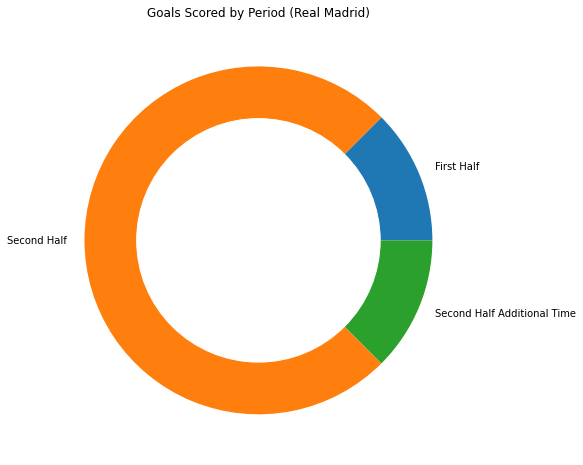

In [14]:
fig_circle = plt.Circle((0,0), 0.7, color='white')
plt.figure(figsize=(8, 8))

plt.pie(madrid_goals_dic.values(), labels=madrid_goals_dic.keys())
p = plt.gcf()
p.gca().add_artist(fig_circle)
plt.title('Goals Scored by Period (Real Madrid)')
plt.show();

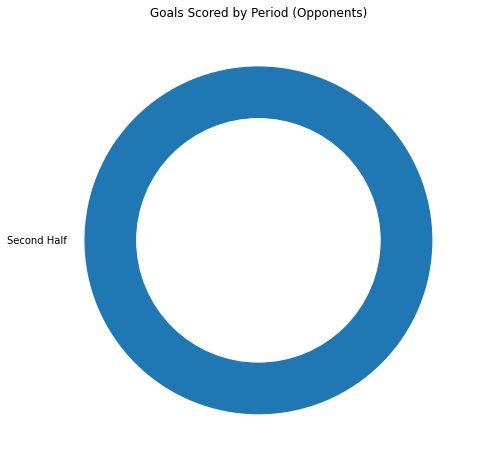

In [15]:
fig_circle = plt.Circle((0,0), 0.7, color='white')
plt.figure(figsize=(8, 8))

plt.pie(against_goals_dic.values(), labels=against_goals_dic.keys())
p = plt.gcf()
p.gca().add_artist(fig_circle)
plt.title('Goals Scored by Period (Opponents)')
plt.show();